D:\Python\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


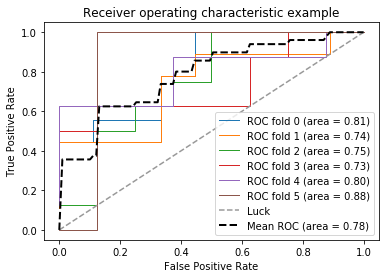

In [1]:
import numpy as np  
from scipy import interp  
import matplotlib.pyplot as plt  
  
from sklearn import svm, datasets  
from sklearn.metrics import roc_curve, auc  
from sklearn.cross_validation import StratifiedKFold  
  
###############################################################################  
# Data IO and generation,导入iris数据，做数据准备  
  
# import some data to play with  
iris = datasets.load_iris()  
X = iris.data  
y = iris.target  
X, y = X[y != 2], y[y != 2]#去掉了label为2，label只能二分，才可以。  
n_samples, n_features = X.shape  
  
# Add noisy features  
random_state = np.random.RandomState(0)  
X = np.c_[X, random_state.randn(n_samples, 200 * n_features)]  
  
###############################################################################  
# Classification and ROC analysis  
#分类，做ROC分析  
  
# Run classifier with cross-validation and plot ROC curves  
#使用6折交叉验证，并且画ROC曲线  
cv = StratifiedKFold(y, n_folds=6)  
classifier = svm.SVC(kernel='linear', probability=True,  
                     random_state=random_state)#注意这里，probability=True,需要，不然预测的时候会出现异常。另外rbf核效果更好些。  
  
mean_tpr = 0.0  
mean_fpr = np.linspace(0, 1, 100)  
all_tpr = []  
  
for i, (train, test) in enumerate(cv):  
    #通过训练数据，使用svm线性核建立模型，并对测试集进行测试，求出预测得分  
    probas_ = classifier.fit(X[train], y[train]).predict_proba(X[test])  
#    print set(y[train])                     #set([0,1]) 即label有两个类别  
#    print len(X[train]),len(X[test])        #训练集有84个，测试集有16个  
#    print "++",probas_                      #predict_proba()函数输出的是测试集在lael各类别上的置信度，  
#    #在哪个类别上的置信度高，则分为哪类  
    # Compute ROC curve and area the curve  
    #通过roc_curve()函数，求出fpr和tpr，以及阈值  
    fpr, tpr, thresholds = roc_curve(y[test], probas_[:, 1])  
    mean_tpr += interp(mean_fpr, fpr, tpr)          #对mean_tpr在mean_fpr处进行插值，通过scipy包调用interp()函数  
    mean_tpr[0] = 0.0                               #初始处为0  
    roc_auc = auc(fpr, tpr)  
    #画图，只需要plt.plot(fpr,tpr),变量roc_auc只是记录auc的值，通过auc()函数能计算出来  
    plt.plot(fpr, tpr, lw=1, label='ROC fold %d (area = %0.2f)' % (i, roc_auc))  
  
#画对角线  
plt.plot([0, 1], [0, 1], '--', color=(0.6, 0.6, 0.6), label='Luck')  
  
mean_tpr /= len(cv)                     #在mean_fpr100个点，每个点处插值插值多次取平均  
mean_tpr[-1] = 1.0                      #坐标最后一个点为（1,1）  
mean_auc = auc(mean_fpr, mean_tpr)      #计算平均AUC值  
#画平均ROC曲线  
#print mean_fpr,len(mean_fpr)  
#print mean_tpr  
plt.plot(mean_fpr, mean_tpr, 'k--',  
         label='Mean ROC (area = %0.2f)' % mean_auc, lw=2)  
  
plt.xlim([-0.05, 1.05])  
plt.ylim([-0.05, 1.05])  
plt.xlabel('False Positive Rate')  
plt.ylabel('True Positive Rate')  
plt.title('Receiver operating characteristic example')  
plt.legend(loc="lower right")  
plt.show()  

## Reference
1. [python sklearn画ROC曲线](http://blog.csdn.net/u010454729/article/details/45098305)